In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import glob
import os.path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
train_dir = os.path.join('./data_new/train')
test_dir = os.path.join('./data_new/test')

imsidir = os.path.join('./data_new/train')
folder_list = os.listdir(imsidir)
categories = folder_list

categories

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

In [3]:
image_w = 90
image_h = 72
X = []
y = []

for idx, cat in enumerate(categories):
    label = [0 for i in range(len(categories))]
    label[idx] = 1
    image_dir = train_dir + "/" + cat
    files = glob.glob(image_dir + '/*.jpg')
    print(label, image_dir, ":", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        X.append(data)
        y.append(label)
X = np.array(X)
y = np.array(y)

[1, 0, 0, 0, 0, 0, 0, 0] ./data_new/train/dyed-lifted-polyps : 900
[0, 1, 0, 0, 0, 0, 0, 0] ./data_new/train/dyed-resection-margins : 900
[0, 0, 1, 0, 0, 0, 0, 0] ./data_new/train/esophagitis : 900
[0, 0, 0, 1, 0, 0, 0, 0] ./data_new/train/normal-cecum : 900
[0, 0, 0, 0, 1, 0, 0, 0] ./data_new/train/normal-pylorus : 900
[0, 0, 0, 0, 0, 1, 0, 0] ./data_new/train/normal-z-line : 900
[0, 0, 0, 0, 0, 0, 1, 0] ./data_new/train/polyps : 900
[0, 0, 0, 0, 0, 0, 0, 1] ./data_new/train/ulcerative-colitis : 900


In [4]:
image_w = 90
image_h = 72
Xt = []
yt = []

for idx, cat in enumerate(categories):
    label = [0 for i in range(len(categories))]
    label[idx] = 1
    image_dir2 = test_dir + "/" + cat
    files2 = glob.glob(image_dir2 + '/*.jpg')
    print(label, image_dir2, ":", len(files2))
    
    for i, f in enumerate(files2):
        img2 = Image.open(f)
        img2 = img2.convert('RGB')
        img2 = img2.resize((image_w, image_h))
        data2 = np.asarray(img2)
        Xt.append(data2)
        yt.append(label)
Xt = np.array(Xt)
yt = np.array(yt)

[1, 0, 0, 0, 0, 0, 0, 0] ./data_new/test/dyed-lifted-polyps : 100
[0, 1, 0, 0, 0, 0, 0, 0] ./data_new/test/dyed-resection-margins : 100
[0, 0, 1, 0, 0, 0, 0, 0] ./data_new/test/esophagitis : 100
[0, 0, 0, 1, 0, 0, 0, 0] ./data_new/test/normal-cecum : 100
[0, 0, 0, 0, 1, 0, 0, 0] ./data_new/test/normal-pylorus : 100
[0, 0, 0, 0, 0, 1, 0, 0] ./data_new/test/normal-z-line : 100
[0, 0, 0, 0, 0, 0, 1, 0] ./data_new/test/polyps : 100
[0, 0, 0, 0, 0, 0, 0, 1] ./data_new/test/ulcerative-colitis : 100


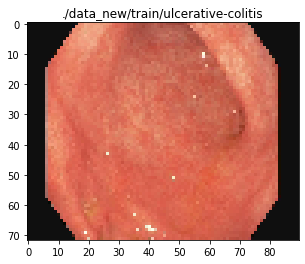

In [5]:
plt.figure()
plt.imshow(data), plt.title(image_dir)
plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X, y, batch_size=720)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(Xt, yt, batch_size=1)

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (720, 72, 90, 3)
배치 레이블 크기: (720, 8)


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(72,90,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

W1109 22:14:41.950869 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 22:14:42.009711 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:519: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 22:14:42.026664 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4140: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1109 22:14:42.083514 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3978: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 88, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 44, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2752640   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=20,
                              epochs=10,
                              validation_data=test_generator,
                              validation_steps=100)

W1109 22:14:42.252095 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1109 22:14:42.309945 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3297: The name tf.log is deprecated. Please use tf.math.log instead.

W1109 22:14:42.511124 10768 deprecation.py:323] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1109 22:14:42.659379 10768 deprecation_wrapper.py:119] From C:\Users\wer29\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:988: The name tf.assi

Epoch 1/10
20/20 [==============================] - 351s 18s/step - loss: 1.2353 - acc: 0.4858 - val_loss: 0.8120 - val_acc: 0.5700
Epoch 2/10
20/20 [==============================] - 345s 17s/step - loss: 0.7097 - acc: 0.6779 - val_loss: 0.6812 - val_acc: 0.6700
Epoch 3/10
20/20 [==============================] - 345s 17s/step - loss: 0.5897 - acc: 0.7423 - val_loss: 0.6496 - val_acc: 0.6500
Epoch 4/10
20/20 [==============================] - 333s 17s/step - loss: 0.5739 - acc: 0.7520 - val_loss: 0.6111 - val_acc: 0.7000
Epoch 5/10
20/20 [==============================] - 350s 18s/step - loss: 0.5157 - acc: 0.7817 - val_loss: 0.4342 - val_acc: 0.8100
Epoch 6/10
20/20 [==============================] - 348s 17s/step - loss: 0.4823 - acc: 0.7985 - val_loss: 0.4257 - val_acc: 0.8000
Epoch 7/10
20/20 [==============================] - 335s 17s/step - loss: 0.4491 - acc: 0.8088 - val_loss: 0.4269 - val_acc: 0.7900
Epoch 8/10
20/20 [==============================] - 329s 16s/step - loss: 0.

In [54]:
class_idx = list(np.arange(8))
class_label = {}

for i in range(8):
    class_label[class_idx[i]] = categories[i]
class_label

{0: 'dyed-lifted-polyps',
 1: 'dyed-resection-margins',
 2: 'esophagitis',
 3: 'normal-cecum',
 4: 'normal-pylorus',
 5: 'normal-z-line',
 6: 'polyps',
 7: 'ulcerative-colitis'}

In [55]:
scores = model.evaluate_generator(test_generator, steps=800)
print(scores)

[0.5071567291409508, 0.7725]


In [63]:
y_predict = model.predict_generator(test_generator, steps=800)
predicted_class = np.argmax(y_predict, axis=1)
print(predicted_class)

[3 6 0 2 1 4 2 1 4 6 3 2 0 4 0 7 4 6 5 0 4 1 7 7 7 1 5 0 4 6 3 2 0 4 2 6 3
 6 6 3 7 4 5 4 2 0 0 6 1 4 3 0 7 7 7 4 1 6 4 5 2 0 3 5 7 1 1 1 3 1 4 2 1 7
 1 7 5 0 0 2 6 1 5 2 1 3 3 4 2 3 5 5 4 3 3 7 4 7 4 5 7 6 1 2 4 3 2 4 0 0 6
 7 4 5 1 3 3 6 5 3 2 6 3 3 0 1 0 6 2 1 2 0 3 5 7 4 4 2 5 7 1 0 5 7 1 3 5 2
 2 2 2 4 1 3 1 3 6 4 6 7 2 4 2 0 6 5 1 0 3 1 1 3 1 3 1 2 5 2 7 2 1 3 5 3 4
 2 1 3 2 6 1 2 1 3 7 1 0 5 3 4 1 7 0 6 2 1 3 2 0 4 0 5 4 6 1 3 1 2 1 7 3 4
 1 1 4 4 3 2 1 3 4 7 7 2 2 7 0 6 2 7 6 4 3 3 7 7 0 7 1 4 0 7 7 5 5 5 6 4 6
 3 1 2 3 4 3 3 6 5 5 3 0 2 3 4 6 1 0 2 4 4 3 2 6 3 2 2 7 5 6 4 1 0 2 1 5 3
 1 7 2 3 2 4 7 3 4 4 4 3 5 2 5 0 2 5 7 1 2 4 1 5 1 0 1 4 3 3 6 0 4 6 7 3 7
 0 3 2 0 5 2 0 3 5 0 1 1 1 7 5 3 0 2 5 4 7 0 4 2 4 4 6 5 3 3 1 7 3 5 3 0 0
 5 7 5 5 7 3 3 6 3 2 2 5 1 3 1 7 1 1 7 5 7 4 2 1 5 5 1 2 7 5 4 7 6 4 6 7 4
 7 2 3 6 7 4 3 0 4 3 1 2 0 2 0 5 2 6 7 7 5 7 4 3 0 5 5 6 3 1 3 7 1 7 7 6 1
 5 2 2 6 6 3 1 6 7 2 3 1 3 7 1 1 3 4 1 4 4 2 4 1 5 4 3 1 0 6 1 1 3 6 1 2 7
 4 1 6 7 3 4 3 0 1 0 2 2 

In [112]:
predictions = [class_label[k] for k in predicted_class]
def pred_class(i):
    print(i, '번째를 예측한 내시경 영상 : ', predictions[i])
pred_class(100)

# test data의 진짜 정답으로 추정되는 것
# 800번째 이미지의 진짜 레이블로 추정되는 것...
# test_generator[799]하면 이미지 배열 + 레이블이 나옴
def check(j):
    print(test_generator[j][1])
    print(pred_class(j))

100 번째를 예측한 내시경 영상 :  [0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
from keras.models import load_model
model.save('kvasir_v2.h5')
#model = load_model('kvasir_v2.h5')